### Info


 SMS spam detection system is used to detect SMS spam using Machine Learning technique called Natural Language Processing and Python, where we have a dataset contain a lot of SMS by extract important words and then use naive classifier we can detect if this SMS is spam or not.

### Libraries


Importing the Required Libraries

In [1]:
# Numpy Library for Numerical Calculations
import numpy as np

# Pandas Library for Dataframe
import pandas as pd

# Matplotlib and for Plottings
import matplotlib.pyplot as plt
%matplotlib inline

# Pickle Library for Saving the Model
import pickle

# Stopwords for removing stopwords in the Text
from nltk.corpus import stopwords

# PorterStemmer for Stemming the Words
from nltk.stem.porter import PorterStemmer

# CountVectorizer for Bagging of Words and Vectorizing it
from sklearn.feature_extraction.text import CountVectorizer

# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

# Decision Tree Classifier, Random Forest Classifier and Multinomial Naïve Bayes are Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Accuracy Score and Confusion Matrix is for Analysis of Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


### Reading informations in the Dataset

In [2]:
spam = pd.read_csv("./data/sms-spam.csv",encoding='latin1')

Checking for null values in Data



In [3]:
spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Checking the First Five Values in the Data

In [4]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Checking the Last Five Values in the Data



In [5]:
spam.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will ï¿½_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


Taking the required Columns in the Dataset



In [6]:
spam.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [7]:
spam = spam[['v1', 'v2']]
spam.columns = ['label', 'message']
spam.replace({'label':{'ham':'0','spam':1}},inplace=True)
spam.sample(5)     

,label,message
1044,1,We know someone who you know that fancies you....
2488,0,Aiyah e rain like quite big leh. If drizzling ...
4546,0,Hey mate. Spoke to the mag people. Weï¿½ï¿½ï¿½...
4017,0,"\GRAN ONLYFOUND OUT AFEW DAYS AGO.CUSOON HONI\"""""
4739,0,"I keep seeing weird shit and bein all \woah\"" ..."


### Categorical analysis and visualization

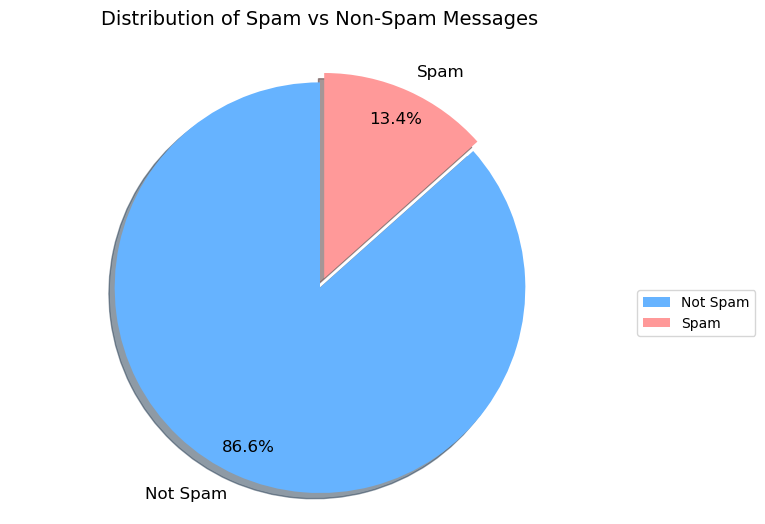

In [8]:
sizes = spam['label'].value_counts()
colors = ['#66b3ff', '#ff9999']  # Light blue and light red
explode = (0.05, 0) 
plt.figure(figsize=(8, 6))
plt.pie(sizes, 
        explode=explode,
        labels=['Not Spam', 'Spam'],
        colors=colors,
        autopct='%1.1f%%',
        pctdistance=0.85,
        shadow=True,
        startangle=90,
        textprops={'fontsize': 12})

plt.title('Distribution of Spam vs Non-Spam Messages', pad=20, fontsize=14)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.show()

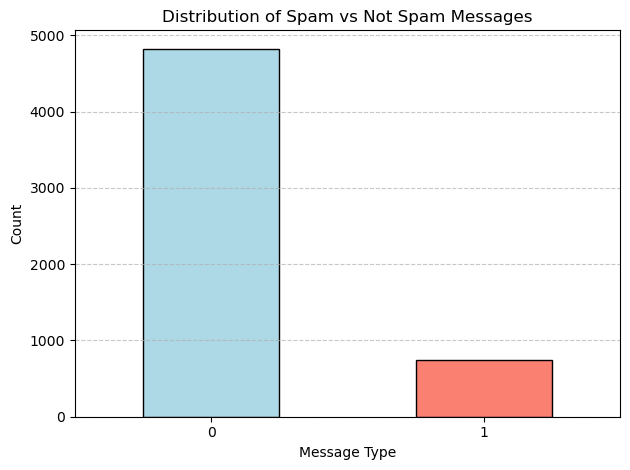

In [9]:
# Create bar plot with customization
spam['label'].value_counts().plot(kind='bar',
                                 color=['lightblue', 'salmon'],
                                 edgecolor='black')

# Customize plot
plt.title('Distribution of Spam vs Not Spam Messages', fontsize=12)
plt.xlabel('Message Type', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Rotate x-axis labels
plt.xticks(rotation=0)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout to prevent label cutoff
plt.tight_layout()

In [10]:
spam.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### NLP

Preprocessing the Text in the Dataset

In [11]:
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ', spam['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Printing the first 5 values in the corpus list
corpus[1:6]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv']

In [12]:
spam.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Creating Bag of Words Model



In [21]:
cv = CountVectorizer(max_features = 4000)
pickle.dump(cv,open("models/vectorizer.pkl",'wb'))

X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['label'])
Y = Y.iloc[:, 1].values

### Data Modeling


Splitting the Dataset into Training and Testing Set

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.20)

### Model Building

Creating the Models



In [24]:
# Decision Tree Classifier, Random Forest Classifier and Multinomial Naïve Bayes,BernoulliNB are Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# Model 1 - Random Forest Classifier
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

# Model 2 - Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)

# Model 3 - Multinomial Naïve Bayes
model3 = MultinomialNB()
model3.fit(X_train, Y_train)

# Model 4 - BernoulliNB
model4 = BernoulliNB()
model4.fit(X_train, Y_train)

BernoulliNB()

 Accuracy Score and Confusion Matrix for Analysis of Models


In [25]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)

# Model 1 - Random Forest Classifier
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred1))
print("Accuracy: ", accuracy_score(Y_test, pred1))
print("--------------------------------")

# Model 2 - Decision Tree Classifier
print("\nDecision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred2))
print("Accuracy: ", accuracy_score(Y_test, pred2))
print("--------------------------------")

# Model 3 - Multinomial Naive Bayes
print("\nMultinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred3))
print("Accuracy: ", accuracy_score(Y_test, pred3))

# Model 4-BernoulliNB
print("\nBernoulliNB")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred4))
print("Accuracy: ", accuracy_score(Y_test, pred4))

Random Forest Classifier
Confusion Matrix: 
[[126  24]
 [  1 964]]
Accuracy:  0.9775784753363229
--------------------------------

Decision Tree Classifier
Confusion Matrix: 
[[133  17]
 [ 12 953]]
Accuracy:  0.9739910313901345
--------------------------------

Multinomial Naïve Bayes
Confusion Matrix: 
[[145   5]
 [ 14 951]]
Accuracy:  0.9829596412556054

BernoulliNB
Confusion Matrix: 
[[132  18]
 [  1 964]]
Accuracy:  0.9829596412556054


Reports For All Models

In [17]:
report1 = classification_report(Y_test, pred1)
print("\nClassification Report for Random Forest Classifier \n", report1)

report2 = classification_report(Y_test, pred2)
print("\nClassification Report for Decision Tree Classifier \n", report2)

report3 = classification_report(Y_test, pred3)
print("\nClassification Report for Multinomial Naive Bayes \n", report3)

report4 = classification_report(Y_test,pred4)
print("\nClassification Report for BernoulliNB\n", report4)


Classification Report for Random Forest Classifier 
               precision    recall  f1-score   support

       False       0.98      0.83      0.90       147
        True       0.97      1.00      0.99       968

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115


Classification Report for Decision Tree Classifier 
               precision    recall  f1-score   support

       False       0.91      0.86      0.88       147
        True       0.98      0.99      0.98       968

    accuracy                           0.97      1115
   macro avg       0.95      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Classification Report for Multinomial Naive Bayes 
               precision    recall  f1-score   support

       False       0.91      0.93      0.92       147
        True       0.99      0.99      0.99       968

    accuracy         

Saving all train model in pickle file

In [26]:
filename = "models/Random_Forest_Classifier.pkl"
pickle.dump(model1, open(filename, 'wb'))
filename = "models/Decision_Tree_Classifier.pkl"
pickle.dump(model2, open(filename, 'wb'))
filename = "models/Multinomial_Naive_Bayes.pkl"
pickle.dump(model3, open(filename, 'wb'))
filename = "models/BernoulliNB.pkl"
pickle.dump(model4,open(filename,'wb'))

print("Saved all Models")

Saved all Models
